In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')


In [2]:
# Reading in file for Loan Eligibility 
data = pd.read_csv('/Users/cillian/Desktop/Ironhack-mini-project/Ironhack-mini-project/Loan_Data-2.csv')

# Our target for this project.
## To understand our data to develop a model that will predict loan approval based on criteria given from loan applicants.



# Processes:
## Data Cleaning - Understanding Nulls and treating them
## EDA - Visualising and analyising columns against our target-
## Fitting the ML Model - Trying different approachs to improve our model.


In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Standardising column names
data.columns = data.columns.str.lower()
data = data.rename(columns={'applicantincome' : 'applicant_income',
                           'coapplicantincome' : 'co_applicant_income',
                           'loanamount' : 'loan_amount',})
data

,loan_id,gender,married,dependents,education,self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
# Checking data types 
data.dtypes

loan_id                 object
gender                  object
married                 object
dependents              object
education               object
self_employed           object
applicant_income         int64
co_applicant_income    float64
loan_amount            float64
loan_amount_term       float64
credit_history         float64
property_area           object
loan_status             object
dtype: object

I seen the dependents column is an object column although contains numbers. 
I checked the value counts to see the range of values and I think its best to convert to int.
My thoughts was if I leave it as a categorical column every type will have the same value even though they hold diferent weights.

In [6]:
# I seen the dependents column is an object column although contains numbers. 
# I checked the value counts to see the range of values and I think its best to convert to int.
# My thoughts was if leave it as a categorical column every type will have the same value even though they hold d
data['dependents'].value_counts()


dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [7]:
# converting dependents column to int

#def clean_dep(x):
   # x = str(x)
    #x = x.replace('+','')
    #x = float(x)
    #return x
#data['dependents'] = data['dependents'].apply(clean_dep)
#data['dependents'].value_counts()

In [8]:
# Now checking for NaNs
data.isna().sum()

loan_id                 0
gender                 13
married                 3
dependents             15
education               0
self_employed          32
applicant_income        0
co_applicant_income     0
loan_amount            22
loan_amount_term       14
credit_history         50
property_area           0
loan_status             0
dtype: int64

# Dealing with NaNs
  - For the gender column i will refer to NaN as other.   
  - For the married column as it is only 3 i will replace it with No.
  - I will do the same for self_employed.
  - For dependents, loan_amount, loan_amount_term i will assign the median value. 
 #### the main reason for chosing the median values was to keep as much data as possible as we have not so many rows.

In [9]:
data = data.drop(['loan_id'],axis=1)

### Undecided on how to treat credit history I will explore the values some more.

In [10]:
data['credit_history'].value_counts()

credit_history
1.0    475
0.0     89
Name: count, dtype: int64

In [11]:
data.loc[data['credit_history'].isnull()]

,gender,married,dependents,education,self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
42,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
79,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
86,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360.0,NaN,Semiurban,Y
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
117,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360.0,NaN,Urban,Y
125,Female,No,0,Graduate,No,3692,0.0,93.0,360.0,NaN,Rural,Y


#### I was unsure what to do about the credit history as while it is only 50 NaNs our dataset isnt that big and I would like to keep as much data and to make good assumptions about the NaNs. I quickly checked if the NaN values affected the loan_status negatively as in was always no. It didnt so I will treat the nulls by assigning the median value.

In [12]:
# Fixing the nulls
data['gender'] = data['gender'].fillna('Other')
data['married'] = data['married'].fillna('No')
data['self_employed'] = data['self_employed'].fillna('No')
#data['dependents'] = data['dependents'].fillna(data['dependents'].median())
data['loan_amount'] = data['loan_amount'].fillna(data['loan_amount'].median())
data['loan_amount_term'] = data['loan_amount_term'].fillna(data['loan_amount_term'].median())
data['credit_history'] = data['credit_history'].fillna(data['credit_history'].median())
data.isna().sum()



gender                  0
married                 0
dependents             15
education               0
self_employed           0
applicant_income        0
co_applicant_income     0
loan_amount             0
loan_amount_term        0
credit_history          0
property_area           0
loan_status             0
dtype: int64

#  Now onto some exploratory data analysis

Frist i will get the IQR to spot outliers

In [13]:
summary =data.describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(lambda x: round(x, 2))
summary

,count,mean,std,min,25%,50%,75%,max,iqr
applicant_income,614.0,5403.46,6109.04,150.0,2877.50,3812.5,5795.00,81000.0,2917.50
co_applicant_income,614.0,1621.25,2926.25,0.0,0.00,1188.5,2297.25,41667.0,2297.25
loan_amount,614.0,145.75,84.11,9.0,100.25,128.0,164.75,700.0,64.50
loan_amount_term,614.0,342.41,64.43,12.0,360.00,360.0,360.00,480.0,0.00
credit_history,614.0,0.86,0.35,0.0,1.00,1.0,1.00,1.0,0.00


## Visualizing numerical columns to see outliers in boxplots

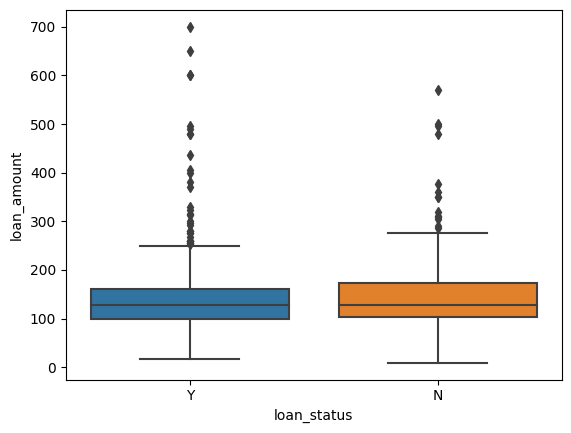

In [14]:
sns.boxplot(x="loan_status", y="loan_amount", data=data) 
plt.show()

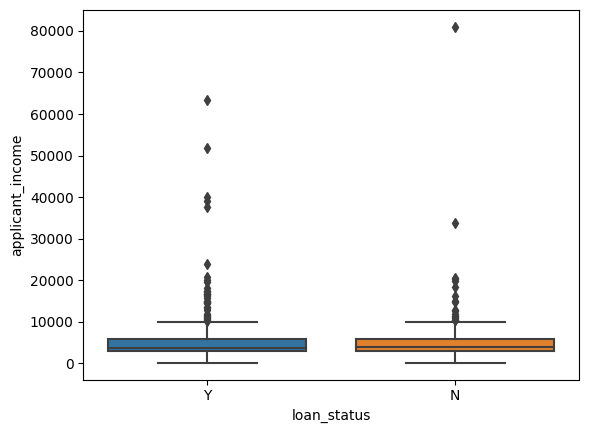

In [15]:
sns.boxplot(x="loan_status", y="applicant_income",data=data)
plt.show()

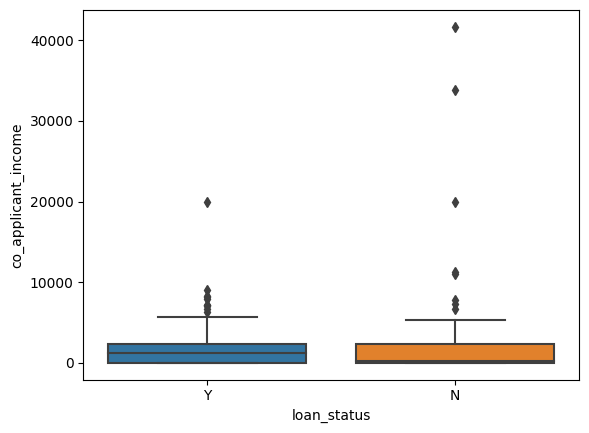

In [16]:
sns.boxplot(x="loan_status", y="co_applicant_income",data=data)
plt.show()

## Analyzing results

#### After checking some boxplots in regards of what I would see as the main columns to affect the yes or no status of loan, I found it intresting to see some high outliers in the no status for applicant_income and co_applicant_income as I would've thought a high income would be a good attribute in securing a loan which must mean there are other factors in the reasoning which I will check. 

#### There are also a lot of outliers in the yes columns with people with high income and securing loans but i think this is more normal as there will always be a small amount of people earning more money.

In [17]:
data_appno= data[(data['applicant_income'] > 10000) & (data['loan_status'] == 'N')]
data_appno.head()

,gender,married,dependents,education,self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
34,Male,No,3+,Graduate,No,12500,3000.0,320.0,360.0,1.0,Rural,N
54,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,360.0,0.0,Urban,N
128,Male,Yes,1,Graduate,Yes,10513,3850.0,160.0,180.0,0.0,Urban,N
138,Male,No,0,Graduate,No,14999,0.0,242.0,360.0,0.0,Semiurban,N


In [18]:
data_appyes= data[(data['applicant_income'] > 10000) & (data['loan_status'] == 'Y')]
data_appyes.head()

,gender,married,dependents,education,self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area,loan_status
67,Male,Yes,1,Graduate,No,10750,0.0,312.0,360.0,1.0,Urban,Y
102,Male,Yes,NaN,Graduate,No,13650,0.0,128.0,360.0,1.0,Urban,Y
106,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban,Y
115,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,Y
119,Female,No,0,Graduate,No,10408,0.0,259.0,360.0,1.0,Urban,Y


### It was again intresting to look at the difference in outliers in appplicant_income between yes and no in the outliers. While it is hard to see at first glance I belive there might be correlation between higher loan_amounts, loan_amount_terms and possibly property_area as a lot of the nos in the outliers were in rural areas. but we will see this later.

In [19]:
numerical_columns = data.select_dtypes("number")
categorical_columns = data.select_dtypes("object")

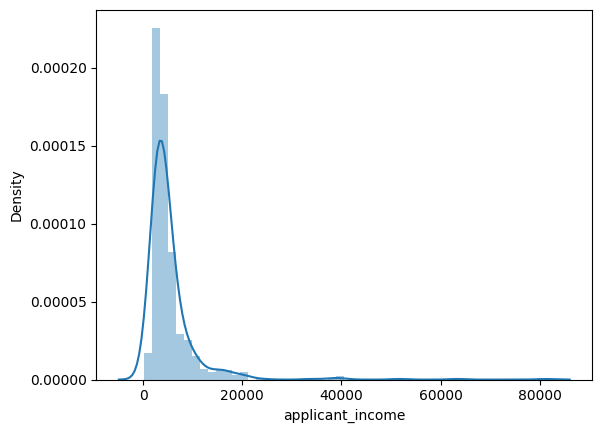

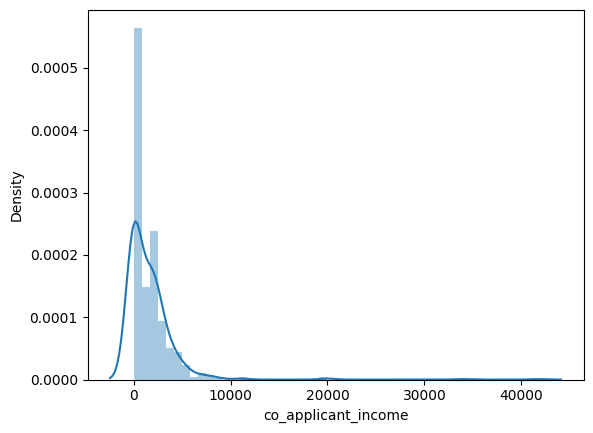

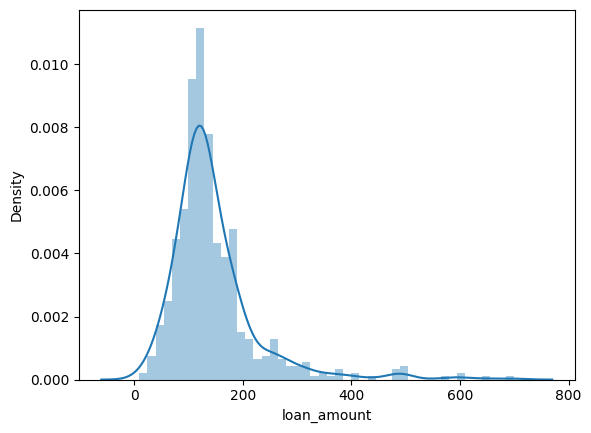

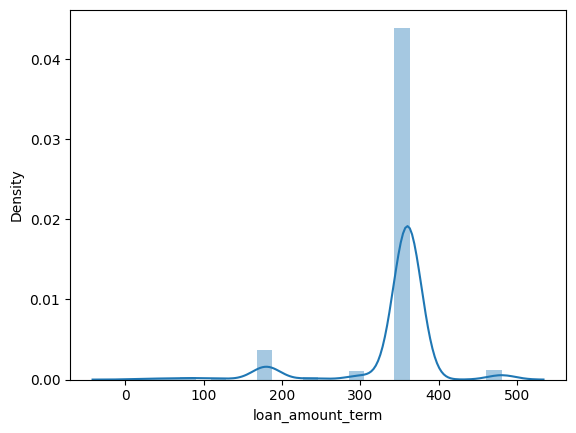

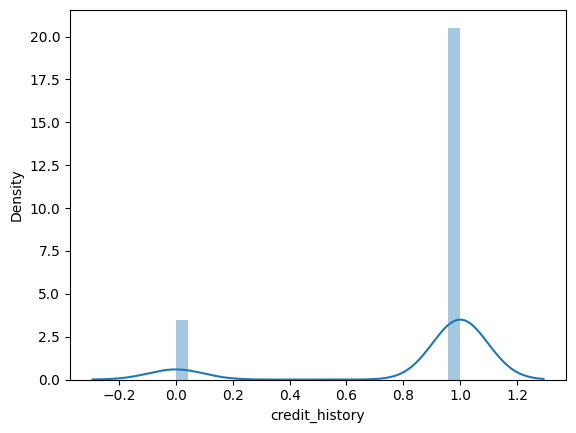

In [20]:
for col in numerical_columns.columns:
  sns.distplot(numerical_columns[col])
  plt.show()

 ### We see a normal distribution considering outliers in the income columns and loan_amount. The other plots make sense to while they are odd the data the display are fixed terms or number of people.

##  Analysing relationships between numerical features against the target.

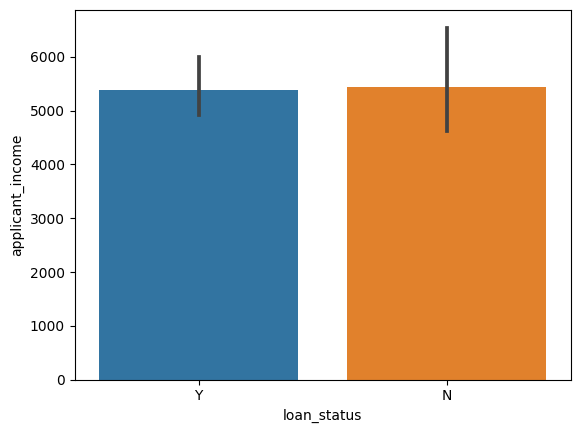

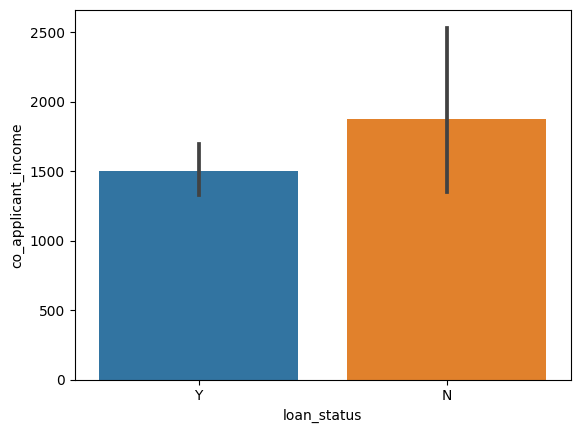

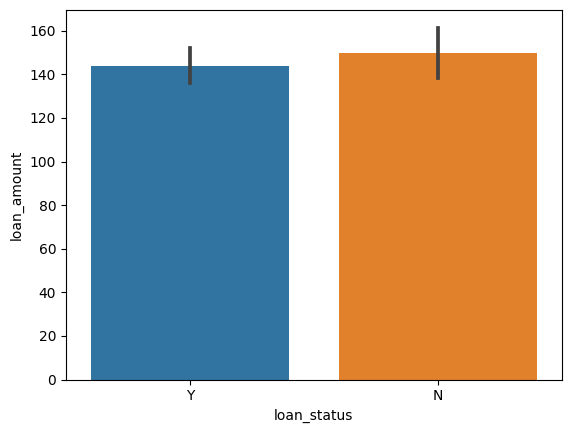

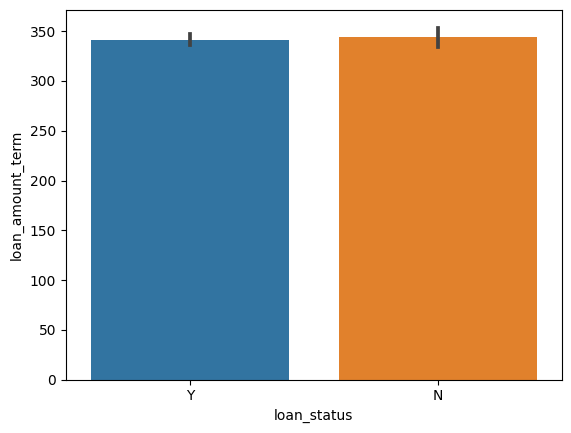

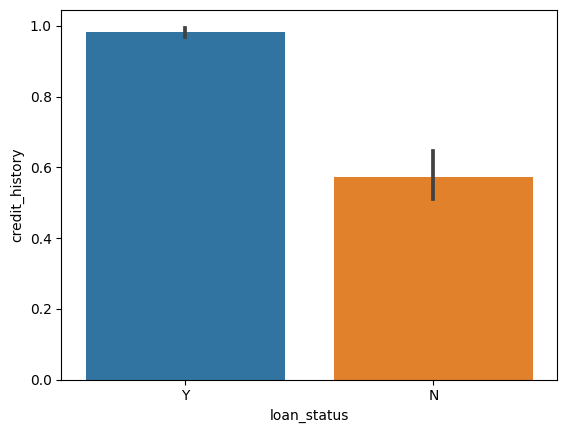

In [21]:
for col in numerical_columns.columns:
    sns.barplot(data=data, x='loan_status', y=col)
    plt.show()

## Results
- I found it surprising that the average income was actually higher for the Nos but I belive it is thrown off by the high outliers and particularly the row with 81,000 income.

- Surprising that co applicant_income is higher in no's but again outliers maybe the problem. Maybe the contingency table will provide more insight. 

- credit_history shows more people with a good credit history are more likely to get loan approval which makes overall sense.
 

In [22]:
for col in data.select_dtypes('object'):
    
    
   
    contingency_table = pd.crosstab(data[col], data['loan_status'])

    
    row_sums = contingency_table.sum(axis=1)
    col_sums = contingency_table.sum(axis=0)
    
    contingency_table["Y"] = contingency_table["Y"] / contingency_table["Y"].sum() * 100
    contingency_table["N"] = contingency_table["N"] / contingency_table["N"].sum() * 100

    
    display(contingency_table)

loan_status,N,Y
gender,,
Female,19.270833,17.772512
Male,78.125000,80.331754
Other,2.604167,1.895735


loan_status,N,Y
married,,
No,41.145833,32.464455
Yes,58.854167,67.535545


loan_status,N,Y
dependents,,
0,57.526882,57.627119
1,19.354839,15.980630
2,13.440860,18.401937
3+,9.677419,7.990315


loan_status,N,Y
education,,
Graduate,72.916667,80.56872
Not Graduate,27.083333,19.43128


loan_status,N,Y
self_employed,,
No,86.458333,86.729858
Yes,13.541667,13.270142


loan_status,N,Y
property_area,,
Rural,35.9375,26.066351
Semiurban,28.1250,42.417062
Urban,35.9375,31.516588


loan_status,N,Y
loan_status,,
N,100.0,0.0
Y,0.0,100.0


## Insights from contingency table
- Married: there is about a 10% difference between loan approval or not. Meaning more likely for loan approval if married.

- Education: again about a 10% percent variance between loan approval or not. More likely for approval if graduated.

- Dependents: Hard to analyse but it is more likely to receive loan approval if dependents are 2 compared to 1 or 3.

- Property_area: Overall more likely to get loan approval if applicant lives in Semiurban and compared to the lower chances of loan approval in Rural or urban settings by at least 10 to 15 %.

 #### I was orignally converting dependents as a int value but thought it would provide more insight in its original form.

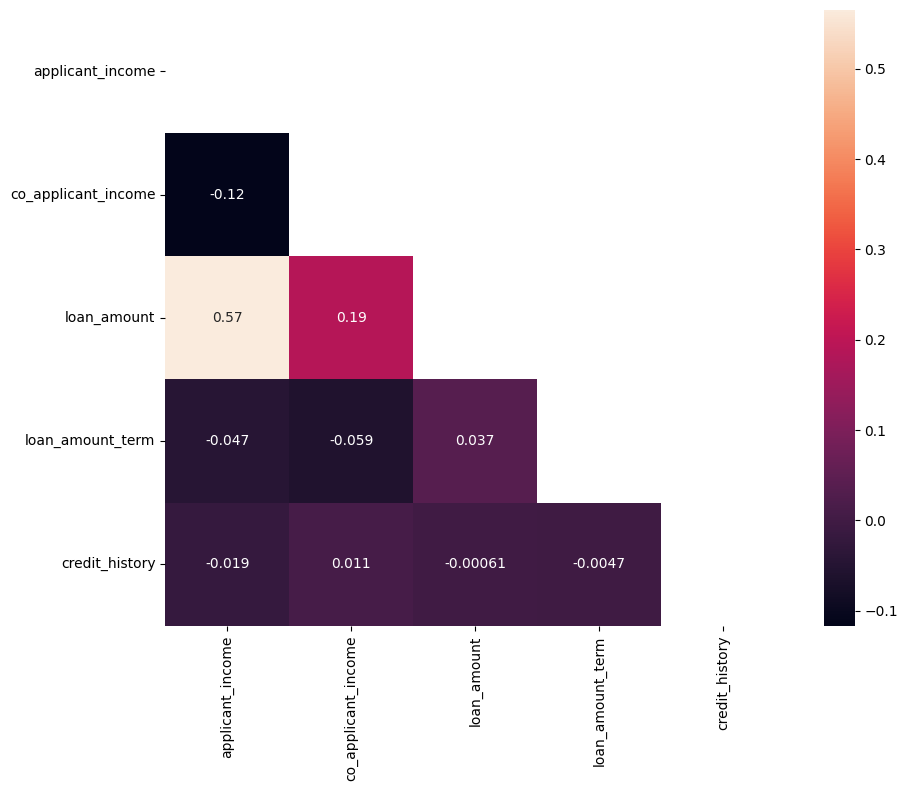

In [23]:
corr_matrix=data.select_dtypes("number").corr()

mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True


fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()

## Correlation Matrix
- The correlation matrix shows decent but not major correlation between the loan_amount and applicant_income and somewhat in co applicant income which makes sense because people will often weigh their loan amount on what they earn.
- there is negative correlations but only in very small amounts.

# Data Processing for Machine Learning.

In [24]:
y= data['loan_status']
X = data.drop('loan_status',axis=1)


## Encoding categorical columns

In [25]:

X = pd.get_dummies(X,columns =['gender','married','dependents','education','self_employed','property_area'])
X

,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,gender_Female,gender_Male,gender_Other,married_No,married_Yes,...,dependents_1,dependents_2,dependents_3+,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban
0,5849,0.0,128.0,360.0,1.0,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,False,True,False,False,True,...,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,False,True,...,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.0,360.0,1.0,False,True,False,False,True,...,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.0,360.0,1.0,False,True,False,True,False,...,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,True,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
610,4106,0.0,40.0,180.0,1.0,False,True,False,False,True,...,False,False,True,True,False,True,False,True,False,False
611,8072,240.0,253.0,360.0,1.0,False,True,False,False,True,...,True,False,False,True,False,True,False,False,False,True
612,7583,0.0,187.0,360.0,1.0,False,True,False,False,True,...,False,True,False,True,False,True,False,False,False,True


## Correlation list of categorical features against target.

In [26]:
pd.get_dummies(data).corr()['loan_status_Y'].sort_values()


loan_status_N             -1.000000
property_area_Rural       -0.100694
education_Not Graduate    -0.085884
married_No                -0.084281
co_applicant_income       -0.059187
property_area_Urban       -0.043621
dependents_1              -0.038740
loan_amount               -0.033214
dependents_3+             -0.026123
gender_Other              -0.022814
loan_amount_term          -0.022549
gender_Female             -0.017987
applicant_income          -0.004710
self_employed_Yes         -0.003700
self_employed_No           0.003700
dependents_0               0.006250
gender_Male                0.025407
dependents_2               0.062384
married_Yes                0.084281
education_Graduate         0.085884
property_area_Semiurban    0.136540
credit_history             0.540556
loan_status_Y              1.000000
Name: loan_status_Y, dtype: float64

In [27]:
pd.get_dummies(data).corr()['loan_status_N'].sort_values()


loan_status_Y             -1.000000
credit_history            -0.540556
property_area_Semiurban   -0.136540
education_Graduate        -0.085884
married_Yes               -0.084281
dependents_2              -0.062384
gender_Male               -0.025407
dependents_0              -0.006250
self_employed_No          -0.003700
self_employed_Yes          0.003700
applicant_income           0.004710
gender_Female              0.017987
loan_amount_term           0.022549
gender_Other               0.022814
dependents_3+              0.026123
loan_amount                0.033214
dependents_1               0.038740
property_area_Urban        0.043621
co_applicant_income        0.059187
married_No                 0.084281
education_Not Graduate     0.085884
property_area_Rural        0.100694
loan_status_N              1.000000
Name: loan_status_N, dtype: float64

## Results
- Again shows strong correlation in postive credit history and to lesser extent Semi urban, graduates and married. This tells us they have decent influence on loan approval.
- As does the negtaive correlation of Rural, non-graduates and not married in not getting loan approval.

# Splitting data into train, test to fit into Machine learning Model.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Applying the fit and running the model. Getting classification scores and predictions

In [29]:
classification = LogisticRegression(random_state=42)

classification.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [30]:
print('The score of the model is = ',classification.score(X_test, y_test))


The score of the model is =  0.7886178861788617


In [31]:
predictions = classification.predict(X_test)
predictions

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

In [32]:
y_test.value_counts()

loan_status
Y    80
N    43
Name: count, dtype: int64

In [33]:
predictions_ = classification.predict_proba(X_test)
predictions_

array([[0.09067058, 0.90932942],
       [0.07560276, 0.92439724],
       [0.22182497, 0.77817503],
       [0.25160211, 0.74839789],
       [0.10788472, 0.89211528],
       [0.33877449, 0.66122551],
       [0.07298403, 0.92701597],
       [0.14214384, 0.85785616],
       [0.37745562, 0.62254438],
       [0.28445755, 0.71554245],
       [0.53725915, 0.46274085],
       [0.23012403, 0.76987597],
       [0.22172246, 0.77827754],
       [0.31925154, 0.68074846],
       [0.1732037 , 0.8267963 ],
       [0.15655674, 0.84344326],
       [0.24161566, 0.75838434],
       [0.15082404, 0.84917596],
       [0.14679795, 0.85320205],
       [0.03059182, 0.96940818],
       [0.18843756, 0.81156244],
       [0.10837343, 0.89162657],
       [0.24619431, 0.75380569],
       [0.14906257, 0.85093743],
       [0.35202284, 0.64797716],
       [0.37267488, 0.62732512],
       [0.48317951, 0.51682049],
       [0.11842142, 0.88157858],
       [0.1494526 , 0.8505474 ],
       [0.09764854, 0.90235146],
       [0.

<Axes: >

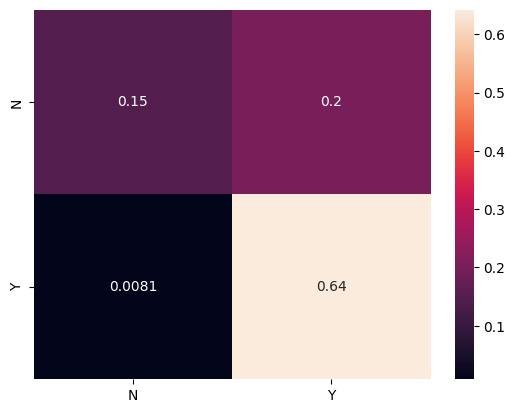

In [34]:
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["N", "Y"], yticklabels=["N", "Y"])

## As we have an Imbalanced dataset I will try some classification algorithms to improve our results.

In [35]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(random_state=42)


X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train) 

y_train_balanced.value_counts()

loan_status
N    342
Y    342
Name: count, dtype: int64

In [36]:
classification = LogisticRegression(random_state=42)
classification.fit(X_train_balanced, y_train_balanced)
classification.score(X_test, y_test)

0.6504065040650406

<Axes: >

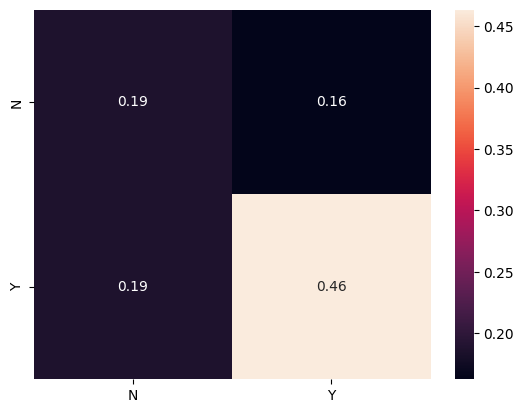

In [37]:
predictions = classification.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["N", "Y"], yticklabels=["N", "Y"])

## We can see that using RandomSampler it decreased our classification score but now Yes is being predicted less and No being predicted slightly more.

## Lets try SMOTE

In [38]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [40]:
classification = LogisticRegression(random_state=42)
classification.fit(X_resampled, y_resampled)
classification.score(X_test, y_test)

0.7642276422764228

<Axes: >

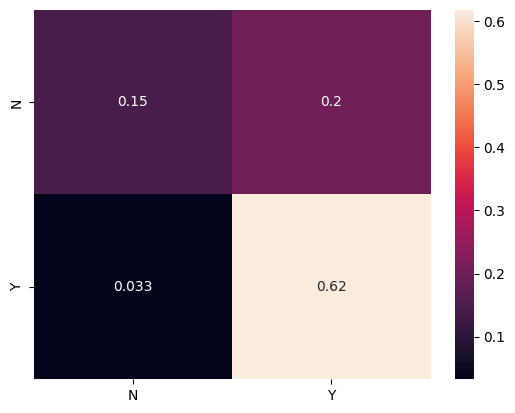

In [41]:
predictions = classification.predict(X_test)
cf_matrix = confusion_matrix(y_test, predictions, normalize='all')
sns.heatmap(cf_matrix, annot=True, xticklabels=["N", "Y"], yticklabels=["N", "Y"])

## the classification score is better but we are back to Yes being predicted prodominatly.

# Conclusions.

I believed I used the right data cleaning practices to ensure the data was as useful to the model as possible, with the goal to predict Loan Eligibility. I identified the correlation between the target and the categorical columns which held the most value for and against loan approval. 

However with an imbalanced dataset it was hard to truly predict correctly Loan Eligibility. 
Utilizing classification algortihms helped but weren't sufficient in the end. With more data we would be able to further our model and provide better results.